In [1]:
from astropy import coordinates as ac, io, wcs
from astropy.io import fits

"""
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                  128                                                  
NAXIS2  =                  128                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
WCSAXES =                    4 / Number of coordinate axes                      
CRPIX1  =      64.003224993701 / Pixel coordinate of reference point            
CRPIX2  =      64.003224993701 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
CRPIX4  =                  1.0 / Pixel coordinate of reference point            
CDELT1  =   -0.064599609375001 / [deg] Coordinate increment at reference point  
CDELT2  =    0.064599609375001 / [deg] Coordinate increment at reference point  
CDELT3  =                  1.0 / Coordinate increment at reference point        
CDELT4  =                  1.0 / [Hz] Coordinate increment at reference point   
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CUNIT4  = 'Hz'                 / Units of coordinate increment and value        
CTYPE1  = 'RA---SIN'           / Right ascension, orthographic/synthesis project
CTYPE2  = 'DEC--SIN'           / Declination, orthographic/synthesis projection 
CTYPE3  = 'STOKES'             / Coordinate type code                           
CTYPE4  = 'FREQ'               / Frequency (linear)                             
CRVAL1  =               161.75 / [deg] Coordinate value at reference point      
CRVAL2  =        58.0833055556 / [deg] Coordinate value at reference point      
CRVAL3  =                  1.0 / Coordinate value at reference point            
CRVAL4  =      144822692.87109 / [Hz] Coordinate value at reference point       
LONPOLE =                180.0 / [deg] Native longitude of celestial pole       
LATPOLE =        58.0833055556 / [deg] Native latitude of celestial pole        
RESTFRQ =      144822692.87109 / [Hz] Line rest frequency                       
MJDREF  =                  0.0 / [d] MJD of fiducial time                       
DATE-OBS= '2015-03-08'         / ISO-8601 time of observation                   
MJD-OBS =              57089.0 / [d] MJD of observation                         
RADESYS = 'ICRS'               / Equatorial coordinate system                   
SPECSYS = 'TOPOCENT'           / Reference frame of spectral coordinates        
END                                                                             
"""

# Create one like this that's 256x256 and put Eric Scmidt's picture in it.



"\nSIMPLE  =                    T / conforms to FITS standard                      \nBITPIX  =                  -32 / array data type                                \nNAXIS   =                    4 / number of array dimensions                     \nNAXIS1  =                  128                                                  \nNAXIS2  =                  128                                                  \nNAXIS3  =                    1                                                  \nNAXIS4  =                    1                                                  \nWCSAXES =                    4 / Number of coordinate axes                      \nCRPIX1  =      64.003224993701 / Pixel coordinate of reference point            \nCRPIX2  =      64.003224993701 / Pixel coordinate of reference point            \nCRPIX3  =                  1.0 / Pixel coordinate of reference point            \nCRPIX4  =                  1.0 / Pixel coordinate of reference point            \nCDELT1  =   -

(1, 1, 1024, 1024)


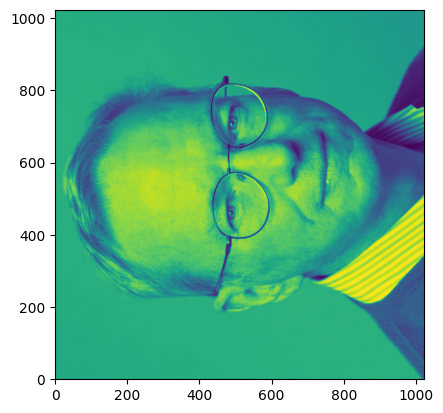

In [30]:
hdu = fits.PrimaryHDU()
hdu.header['SIMPLE'] = True
hdu.header['BITPIX'] = -32
hdu.header['NAXIS'] = 4
hdu.header['NAXIS1'] = 1024
hdu.header['NAXIS2'] = 1024
hdu.header['NAXIS3'] = 1
hdu.header['NAXIS4'] = 1
hdu.header['WCSAXES'] = 4
hdu.header['CRPIX1'] = 512.
hdu.header['CRPIX2'] = 512.
hdu.header['CRPIX3'] = 1.0
hdu.header['CRPIX4'] = 1.0
hdu.header['CDELT1'] = -0.5/3600. # 1/2 arcsec
hdu.header['CDELT2'] = 0.5/3600. # 1/2 arcsec
hdu.header['CDELT3'] = 1.0
hdu.header['CDELT4'] = 1.0
hdu.header['CUNIT1'] = 'deg'
hdu.header['CUNIT2'] = 'deg'
hdu.header['CUNIT4'] = 'Hz'
hdu.header['CTYPE1'] = 'RA---SIN'
hdu.header['CTYPE2'] = 'DEC--SIN'
hdu.header['CTYPE3'] = 'STOKES'
hdu.header['CTYPE4'] = 'FREQ'
hdu.header['CRVAL1'] = 161.75
hdu.header['CRVAL2'] = 58.0833055556
hdu.header['CRVAL3'] = 1.0
hdu.header['CRVAL4'] = 144822692.87109
hdu.header['LONPOLE'] = 180.0
hdu.header['LATPOLE'] = 58.0833055556
hdu.header['RESTFRQ'] = 144822692.87109
hdu.header['MJDREF'] = 0.0
hdu.header['DATE-OBS'] = '2015-03-08'
hdu.header['MJD-OBS'] = 57089.0
hdu.header['RADESYS'] = 'ICRS'
hdu.header['SPECSYS'] = 'TOPOCENT'

# Read eric_schmidt.jpeg into array, resize to 256x256, scale to 0-1, and put in hdu.data

import PIL
from PIL import Image
import numpy as np

# Open
im = Image.open('eric_schmidt.jpeg')
# Resize
im = im.resize((1024,1024))
# Make black and white
im = im.convert('L')
# Convert to array
im = np.array(im)
# Scale to 0-1
im = im / np.max(im)
# Put in hdu.data
hdu.data = im.reshape(1024,1024, 1, 1).astype(np.float32).T
hdu.writeto('eric_schmidt-model.fits', overwrite=True)
print(hdu.data.shape)
import pylab as plt
plt.imshow(hdu.data[0,0,:,:], origin='lower')
plt.show()
# Store
    


Filename: test_faint_sky-model.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (128, 128, 1, 1)   float32   
None
(1, 1, 128, 128)


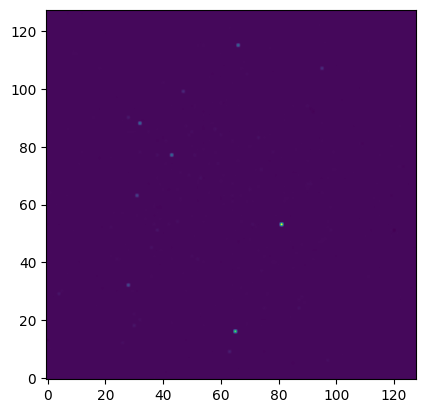

In [31]:
# with fits.open('test_faint_sky-model.fits') as hdul:
#     print(hdul.info())
#     # print(hdul[0].header)
#     # print(hdul[0].data)
#     print(hdul[0].data.shape)
#     plt.imshow(hdul[0].data[0,0,:,:], origin='lower')
#     plt.show()

Filename: eric_schmidt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   (1024, 1024, 1, 1)   float32   
None
(1, 1, 1024, 1024)


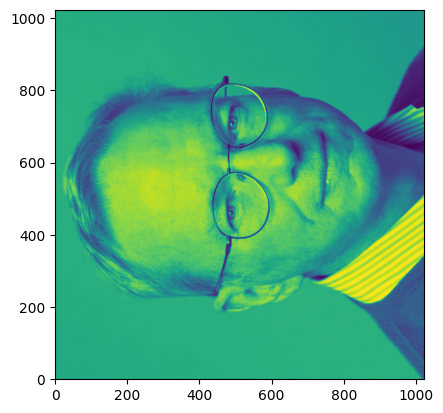

In [32]:
with fits.open('eric_schmidt.fits') as hdul:
    print(hdul.info())
    # print(hdul[0].header)
    # print(hdul[0].data)
    print(hdul[0].data.shape)
    plt.imshow(hdul[0].data[0,0,:,:], origin='lower')
    plt.show()